In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
combined_data = pd.read_csv("clean_data/combined_data/combined_data_pilot4.csv")

In [3]:
combined_data = combined_data.loc[combined_data["participant_code"] != "q9lz9yeq"]
combined_data = combined_data.loc[combined_data["participant_code"] != "5htytebn"]

#Create unique players
combined_data["player_nb"] = combined_data["player"]
combined_data["player"] = combined_data["player"].astype(str)
combined_data["player"] = combined_data["player"] + combined_data["participant_code"]

#combine session code with mastok session
combined_data['mk_session'] = combined_data['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
combined_data['mk_session'] = combined_data['mk_session'] + "_" + combined_data['session_code']

#Create a new column for manip of other player in each dyad. 
combined_data["other_manipulation"] = np.where(combined_data["manipulation"] == "dominant", "submissive", "dominant")

df_responded = combined_data[combined_data['offer_response'].notna()]

In [4]:

print(df_responded["offer_response"].mean()) #95.8 of offers are accepted. 

0.9585492227979274


### TRIAL PAYOFF

7.155440414507772


<Axes: xlabel='sent_amount', ylabel='Count'>

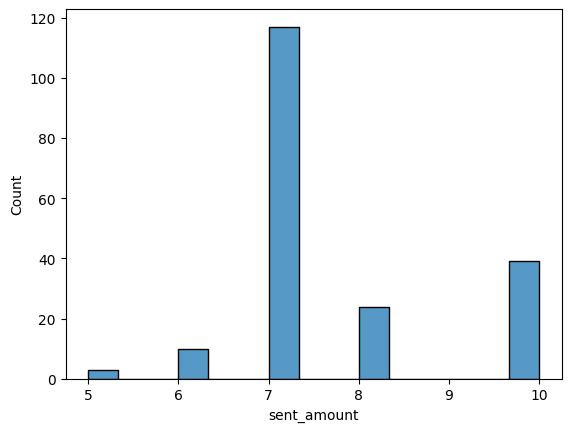

In [13]:
print(df_responded["trial_payoff"].mean()) #7.1
sns.histplot(x = "sent_amount", data=df_responded)

manipulation
dominant      7.156250
submissive    7.154639
Name: trial_payoff, dtype: float64


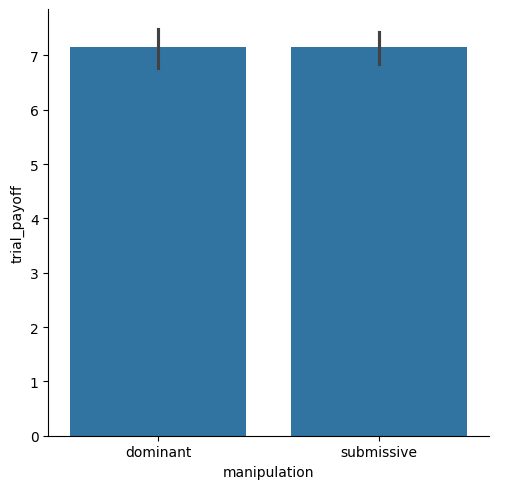

In [16]:

print(df_responded.groupby(["manipulation"])['trial_payoff'].mean())
df_analysis = df_responded.groupby(["manipulation", "player"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "manipulation", y = "trial_payoff", data = df_analysis, kind = "bar")

               player       role manipulation  trial_payoff
0   1odegsytdodegsytd   proposer     dominant      5.000000
1   1odegsytdodegsytd   proposer   submissive      5.000000
2   1odegsytdodegsytd  responder     dominant      8.800000
3   1odegsytdodegsytd  responder   submissive      9.600000
4   1wng442qowng442qo   proposer     dominant      6.400000
5   1wng442qowng442qo   proposer   submissive      8.200000
6   1wng442qowng442qo  responder     dominant      7.000000
7   1wng442qowng442qo  responder   submissive      6.800000
8   26l6sdfbr6l6sdfbr   proposer     dominant      5.800000
9   26l6sdfbr6l6sdfbr   proposer   submissive      7.200000
10  26l6sdfbr6l6sdfbr  responder     dominant      8.250000
11  26l6sdfbr6l6sdfbr  responder   submissive      8.166667
12  2lyscyjvklyscyjvk   proposer     dominant      8.000000
13  2lyscyjvklyscyjvk   proposer   submissive      8.000000
14  2lyscyjvklyscyjvk  responder     dominant      7.000000
15  2lyscyjvklyscyjvk  responder   submi

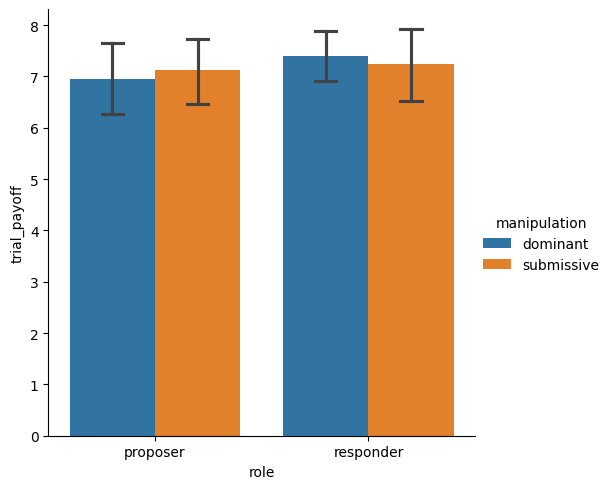

In [17]:

#ALL DATA, grouped according to player, manip and role.
df_analysis = df_responded.groupby(["player","role","manipulation"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", hue = "manipulation", kind = "bar", data = df_analysis, dodge= True, capsize = .2)

role
proposer     7.031579
responder    7.275510
Name: trial_payoff, dtype: float64


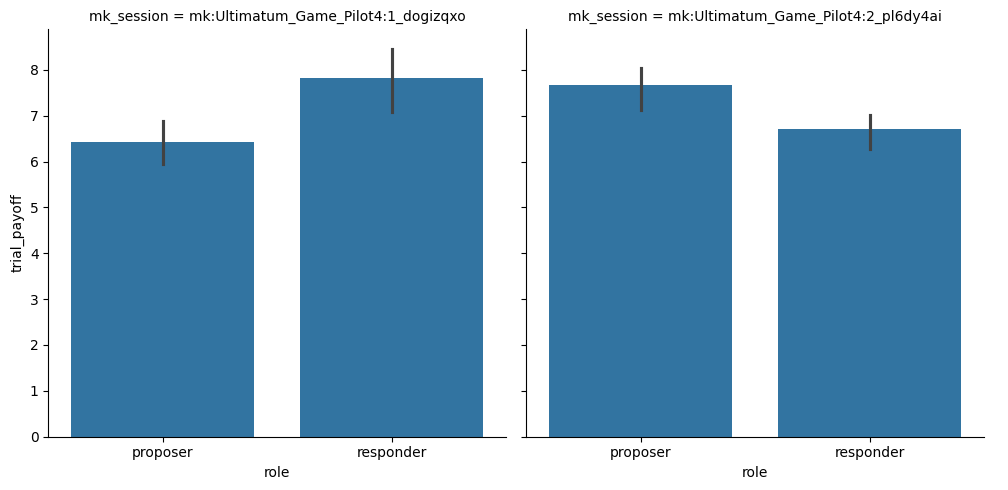

In [7]:
print(df_responded.groupby(["role"])['trial_payoff'].mean())
df_analysis = df_responded.groupby(["role", "player"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", y = "trial_payoff", col = "mk_session", data = df_responded, kind = "bar")